# Github syncronize

In [3]:
import os

repo_url = "https://github.com/Mohamed66Hemdan/Car_Price_Predection.git"

os.system("git init")
os.system(f"git remote add origin {repo_url}")
os.system("git add .")
os.system('git commit -m "Upload from notebook"')
os.system("git branch -M main")
os.system("git push -u origin main")


0

## ==========================

# Library 

In [1]:
## =====================
# Data Preprocessing
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
## =====================
# Data Preprocessing
from sklearn.preprocessing import StandardScaler , MinMaxScaler , RobustScaler
from sklearn.preprocessing import LabelEncoder , OneHotEncoder 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
## =====================
# Machine Learning Models
from sklearn.linear_model import LinearRegression

## ===================================

# Data Preparation

### ---> Data Exploration

In [11]:
data = pd.read_csv('./CarPrice_Assignment.csv')
df = data.copy()
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [5]:
df.shape

(205, 26)

In [6]:
# Print categorical columns
cat_cols = [col for col in df.columns if df[col].dtype == 'O']
print(len(cat_cols))
cat_cols

10


['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [7]:
# Print Numeric columns
num_cols = [col for col in df.columns if df[col].dtype in ['float64', 'int64'] ]
print(len(num_cols))
num_cols

16


['car_ID',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

### ---> Data Cleaning

In [8]:
# Check Is Null
# df.isna().sum().T
pd.DataFrame(df.isna().sum())

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


In [9]:
# Check IS Duplicated
duplicates_count = df.duplicated().sum()
duplicates_count

0

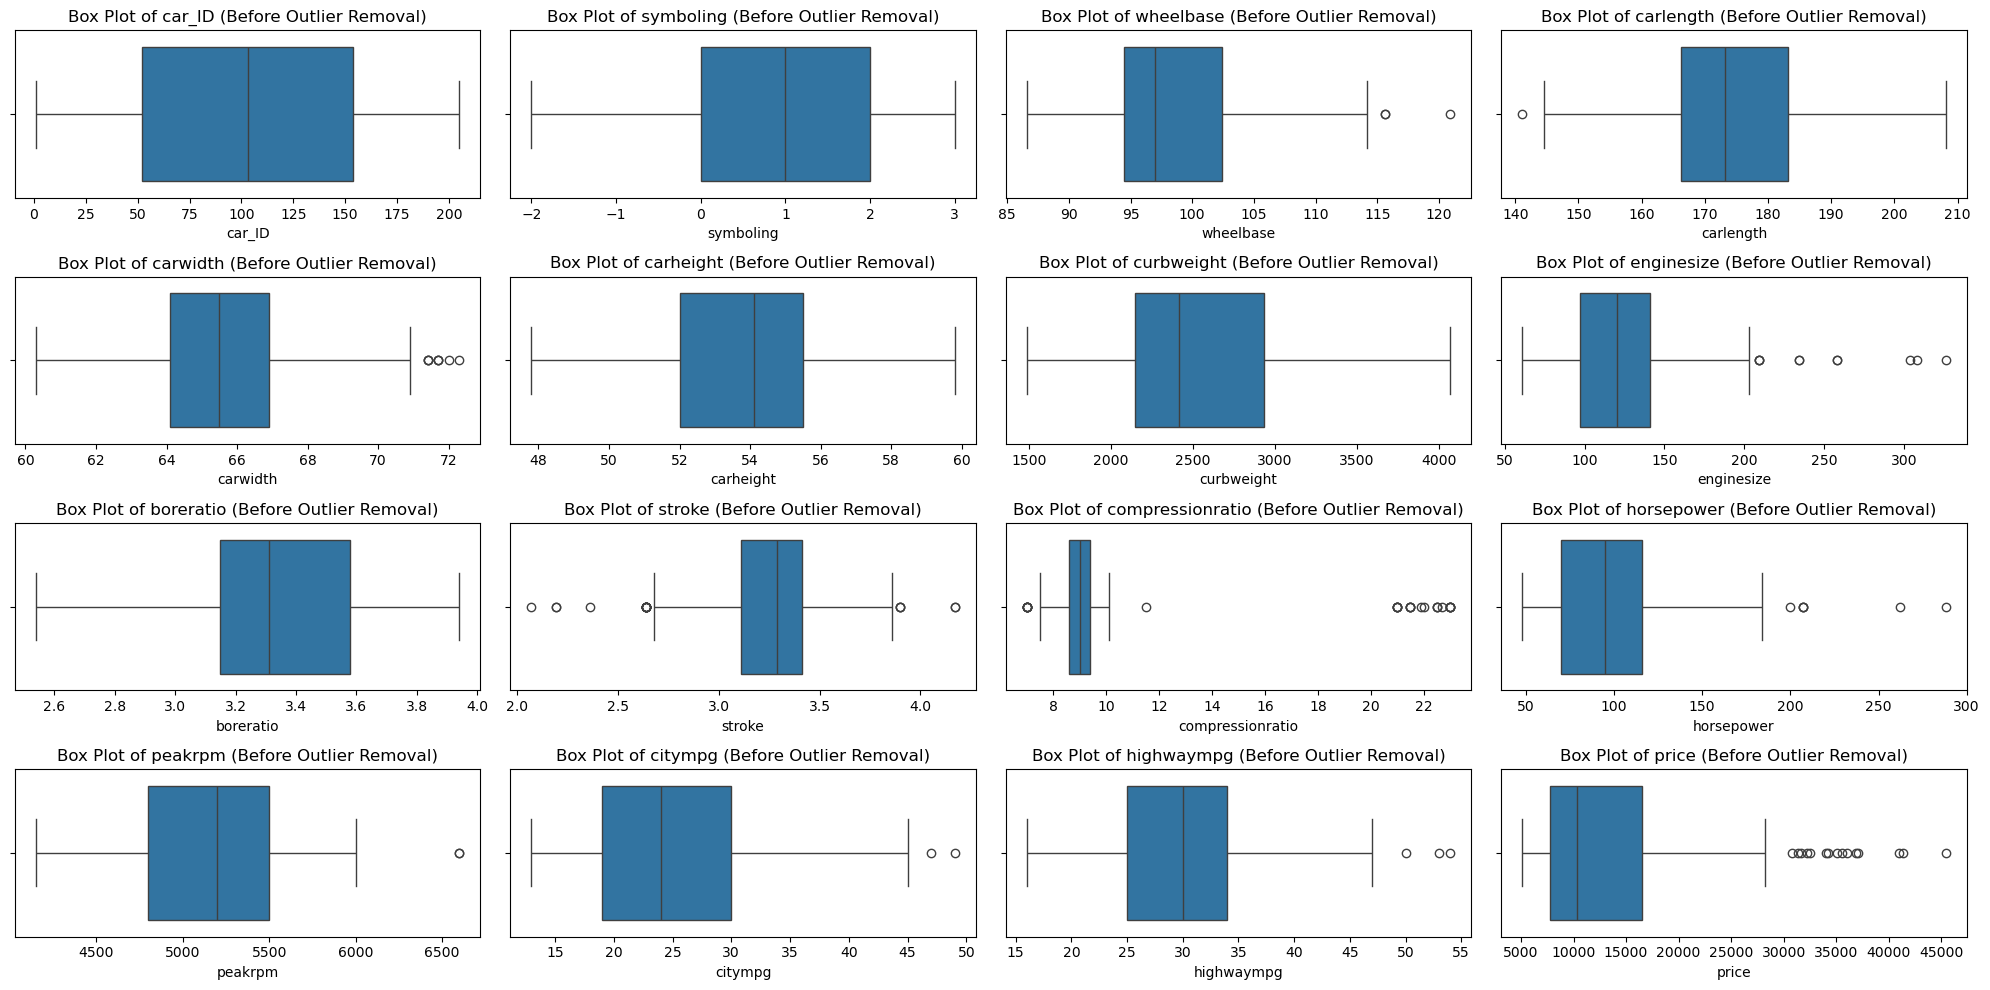

In [17]:
# Check Outlier
df_num = df.select_dtypes(include=['int64', 'float64'])

col = list(df_num.columns)
fig, axes = plt.subplots(4, 4, figsize=(20, 10))
k = 0
for i in range(4):
    for j in range(4):
        if k < len(col):
            sns.boxplot(data=df, x=col[k], ax=axes[i, j])
            axes[i, j].set_title(f'Box Plot of {col[k]} (Before Outlier Removal)')
            k += 1
        else:
            axes[i, j].axis('off')
plt.tight_layout()
plt.show()


In [18]:
df.tail(3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [19]:
df['CompanyName'] = df['CarName'].apply(lambda x: x.split(" ")[0])
df.tail(3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0,volvo


## ===================================

# Machine Learning Model 

In [ ]:
num_pipline = Pipeline([
    '
])